In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_excel('/content/cycle_time.xlsx')
df.head()

,process_steps,machine_age_years,operator_skill_level,material_type,tolerance_level,setup_time_minutes,automation_level,quality_checks,batch_quantity,complexity_score,cycle_time_minutes
0,6.0,0.351194,Beginner,Plastic,Standard,NaN,Manual,Sampling,859.0,1.0,144.828263
1,17.0,1.271697,Intermediate,Composite,Standard,10.481055,Semi-Auto,Sampling,293.0,1.0,6.449919
2,10.0,10.443939,Intermediate,Wood,Precision,109.285165,Semi-Auto,NaN,365.0,5.0,165.767686
3,17.0,10.634850,Advanced,Plastic,Ultra-Precision,95.566136,Manual,NaN,651.0,4.0,71.983546
4,9.0,4.472787,Expert,Composite,Ultra-Precision,85.362859,Semi-Auto,NaN,971.0,8.0,176.058759


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   process_steps         951 non-null    float64
 1   machine_age_years     958 non-null    float64
 2   operator_skill_level  953 non-null    object 
 3   material_type         947 non-null    object 
 4   tolerance_level       955 non-null    object 
 5   setup_time_minutes    957 non-null    float64
 6   automation_level      944 non-null    object 
 7   quality_checks        659 non-null    object 
 8   batch_quantity        944 non-null    float64
 9   complexity_score      958 non-null    float64
 10  cycle_time_minutes    962 non-null    float64
dtypes: float64(6), object(5)
memory usage: 86.1+ KB


In [ ]:
df.isnull().sum()

,0
process_steps,49
machine_age_years,42
operator_skill_level,47
material_type,53
tolerance_level,45
setup_time_minutes,43
automation_level,56
quality_checks,341
batch_quantity,56
complexity_score,42


In [ ]:
df = df.fillna(method='ffill')

/tmp/ipython-input-569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: Index(['process_steps', 'machine_age_years', 'setup_time_minutes',
       'batch_quantity', 'complexity_score', 'cycle_time_minutes'],
      dtype='object')
Categorical columns: Index(['operator_skill_level', 'material_type', 'tolerance_level',
       'automation_level', 'quality_checks'],
      dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer

# Imputer for numerical columns
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
df.isnull().sum()

,0
process_steps,0
machine_age_years,0
operator_skill_level,0
material_type,0
tolerance_level,0
setup_time_minutes,0
automation_level,0
quality_checks,0
batch_quantity,0
complexity_score,0


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded.head()

,process_steps,machine_age_years,setup_time_minutes,batch_quantity,complexity_score,cycle_time_minutes,operator_skill_level_Beginner,operator_skill_level_Expert,operator_skill_level_Intermediate,material_type_Metal,material_type_Plastic,material_type_Wood,tolerance_level_Standard,tolerance_level_Ultra-Precision,automation_level_Manual,automation_level_Semi-Auto,quality_checks_Sampling
0,6.0,0.351194,62.163421,859.0,1.0,144.828263,True,False,False,False,True,False,True,False,True,False,True
1,17.0,1.271697,10.481055,293.0,1.0,6.449919,False,False,True,False,False,False,True,False,False,True,True
2,10.0,10.443939,109.285165,365.0,5.0,165.767686,False,False,True,False,False,True,False,False,False,True,True
3,17.0,10.634850,95.566136,651.0,4.0,71.983546,False,False,False,False,True,False,False,True,True,False,True
4,9.0,4.472787,85.362859,971.0,8.0,176.058759,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
X = df_encoded.drop('cycle_time_minutes', axis=1)
y = df_encoded['cycle_time_minutes']

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 16)
y shape: (1000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (800, 16)
X_test : (200, 16)
y_train: (800,)
y_test : (200,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# R² score
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R² score:", r2_lr)

Linear Regression R² score: -0.03588992497333887


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest R² score:", r2_rf)

Random Forest R² score: -0.060319114142419306


In [ ]:
print("Linear Regression R² :", r2_lr)
print("Random Forest R²    :", r2_rf)

Linear Regression R² : -0.03588992497333887
Random Forest R²    : -0.060319114142419306


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('cycle_time.xlsx')

In [9]:
df.head()

,process_steps,machine_age_years,operator_skill_level,material_type,tolerance_level,setup_time_minutes,automation_level,quality_checks,batch_quantity,complexity_score,cycle_time_minutes
0,6.0,0.351194,Beginner,Plastic,Standard,NaN,Manual,Sampling,859.0,1.0,144.828263
1,17.0,1.271697,Intermediate,Composite,Standard,10.481055,Semi-Auto,Sampling,293.0,1.0,6.449919
2,10.0,10.443939,Intermediate,Wood,Precision,109.285165,Semi-Auto,NaN,365.0,5.0,165.767686
3,17.0,10.634850,Advanced,Plastic,Ultra-Precision,95.566136,Manual,NaN,651.0,4.0,71.983546
4,9.0,4.472787,Expert,Composite,Ultra-Precision,85.362859,Semi-Auto,NaN,971.0,8.0,176.058759


In [12]:
print(df.columns)

Index(['process_steps', 'machine_age_years', 'operator_skill_level',
       'material_type', 'tolerance_level', 'setup_time_minutes',
       'automation_level', 'quality_checks', 'batch_quantity',
       'complexity_score', 'cycle_time_minutes'],
      dtype='object')


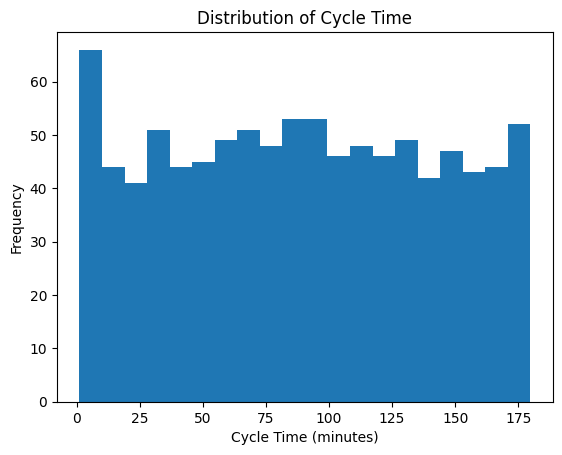

In [14]:
plt.figure()
plt.hist(df['cycle_time_minutes'], bins=20)
plt.xlabel('Cycle Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Cycle Time')
plt.show()

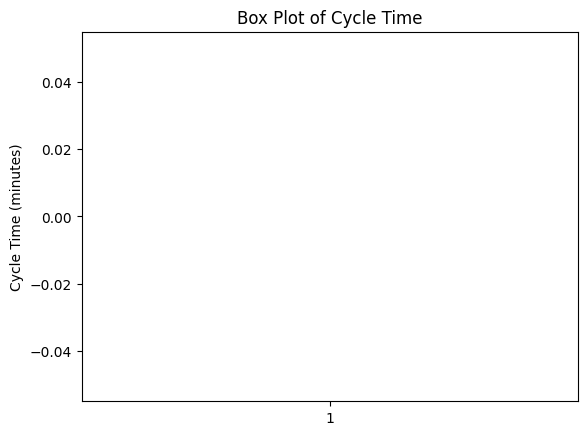

In [15]:
plt.figure()
plt.boxplot(df['cycle_time_minutes'])
plt.ylabel('Cycle Time (minutes)')
plt.title('Box Plot of Cycle Time')
plt.show()

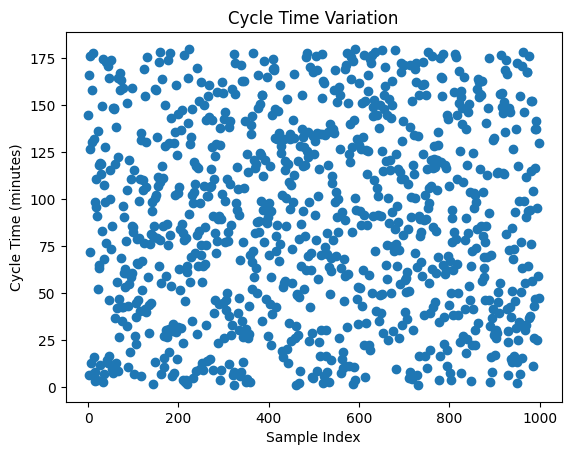

In [16]:
plt.figure()
plt.scatter(df.index, df['cycle_time_minutes'])
plt.xlabel('Sample Index')
plt.ylabel('Cycle Time (minutes)')
plt.title('Cycle Time Variation')
plt.show()